In [1]:
import pandas as pd

In [3]:
# reading the data from the CSV file into a pandas dataframe with column names
columns = ["buy_price", "maint_price", "doors", "capacity", "luggage_size", "safety", "class"]
df = pd.read_csv("car_data.csv", names=columns)

df

,buy_price,maint_price,doors,capacity,luggage_size,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# **Preprocessing the data**

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
# total number of values missing - none for this dataset
print(f"Values missing: {df.isnull().sum()}\n")

# encoding categorical data into numerical values, all attributes are categorical
le = LabelEncoder()
column_list = df.columns.tolist()
df[column_list] = df[column_list].apply(lambda col: le.fit_transform(col))

df

Values missing: buy_price       0
maint_price     0
doors           0
capacity        0
luggage_size    0
safety          0
class           0
dtype: int64



,buy_price,maint_price,doors,capacity,luggage_size,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


# **Developing the model**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [7]:
# creating seperate dataframes for the feature attributes and the target
features_df = df.drop("class", axis=1)
target_df = df["class"]

# splitting data into training and testing data with 25% being for testing
feat_train, feat_test, target_train, target_test = train_test_split(features_df, target_df, test_size=0.25, random_state=0)


In [8]:
# initializing decision tree object with random state 0
dt = DecisionTreeClassifier(random_state=0)
dt.fit(feat_train, target_train)

# initalizing the neural network object using the sigmoid function for activation
# and random state 0 for reproducability
mlp = MLPClassifier(random_state=0, activation="logistic", solver="lbfgs")
mlp.fit(feat_train, target_train)

MLPClassifier(activation='logistic', random_state=0, solver='lbfgs')

In [9]:
# predict using the testing features for both models
neural_predict = mlp.predict(feat_test)
dt_predict = dt.predict(feat_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# decision tree evaluation
dt_accuracy = accuracy_score(target_test, dt_predict)
print(f"Decision Tree accuracy: {round(dt_accuracy, 4)}")
print("Decision Tree Classification Report:")
print(classification_report(target_test, dt_predict))

# neural network evaluation
neural_accuracy = accuracy_score(target_test, neural_predict)
print(f"Neural Network accuracy: {round(neural_accuracy, 4)}")
print("Neural Network Classification Report:")
print(classification_report(target_test, neural_predict))

Decision Tree accuracy: 0.9769
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        99
           1       0.84      1.00      0.91        21
           2       0.99      0.99      0.99       296
           3       1.00      0.94      0.97        16

    accuracy                           0.98       432
   macro avg       0.95      0.97      0.96       432
weighted avg       0.98      0.98      0.98       432

Neural Network accuracy: 0.9421
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        99
           1       0.77      0.95      0.85        21
           2       0.96      0.98      0.97       296
           3       1.00      0.94      0.97        16

    accuracy                           0.94       432
   macro avg       0.91      0.93      0.92       432
weighted avg       0.94      0.94      0.94    

# **Hyperparameter Tuning**

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
# decision tree hyperparameter tuning
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=3, n_jobs=-1, verbose=1)
dt_grid_search.fit(feat_train, target_train)
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
dt_best_model = dt_grid_search.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [15]:
dt_best_predict = dt_best_model.predict(feat_test)
# best parameter decision tree evaluation
dt_best_accuracy = accuracy_score(target_test, dt_best_predict)
print(f"Decision Tree accuracy: {round(dt_best_accuracy, 4)}")
print("Decision Tree Best Classification Report:")
print(classification_report(target_test, dt_best_predict))

Decision Tree accuracy: 0.9769
Decision Tree Best Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        99
           1       0.81      1.00      0.89        21
           2       0.99      1.00      1.00       296
           3       1.00      0.94      0.97        16

    accuracy                           0.98       432
   macro avg       0.95      0.97      0.95       432
weighted avg       0.98      0.98      0.98       432



In [16]:
# neural network hyperparameter tuning
nn_params = {
    'hidden_layer_sizes': [(50,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01]
}
nn_grid_search = GridSearchCV(MLPClassifier(max_iter=200), nn_params, cv=3, n_jobs=-1, verbose=1)
nn_grid_search.fit(feat_train, target_train)
print("Best Neural Network Parameters:", nn_grid_search.best_params_)
nn_best_model = nn_grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Neural Network Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
nn_best_predict = nn_best_model.predict(feat_test)
# best neural network evaluation
nn_best_accuracy = accuracy_score(target_test, nn_best_predict)
print(f"Decision Tree accuracy: {round(nn_best_accuracy, 4)}")
print("Decision Tree Best Classification Report:")
print(classification_report(target_test, nn_best_predict))

Decision Tree accuracy: 0.9745
Decision Tree Best Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        99
           1       0.90      0.86      0.88        21
           2       0.98      0.99      0.99       296
           3       0.83      0.94      0.88        16

    accuracy                           0.97       432
   macro avg       0.93      0.93      0.93       432
weighted avg       0.98      0.97      0.97       432



# **Model Evaluation**

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

Decision Tree Model Evaluation:
Accuracy: 0.9815, Precision: 0.9836, Recall: 0.9815, F1 Score: 0.9818

Neural Network Model Evaluation:
Accuracy: 0.9745, Precision: 0.9751, Recall: 0.9745, F1 Score: 0.9746


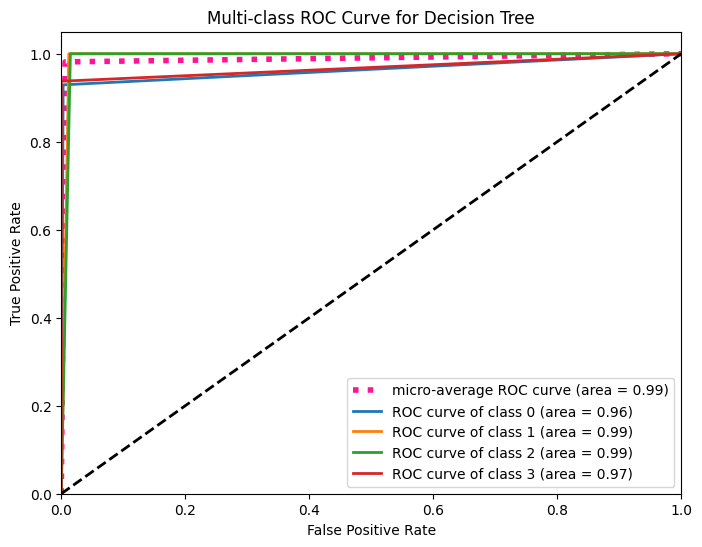

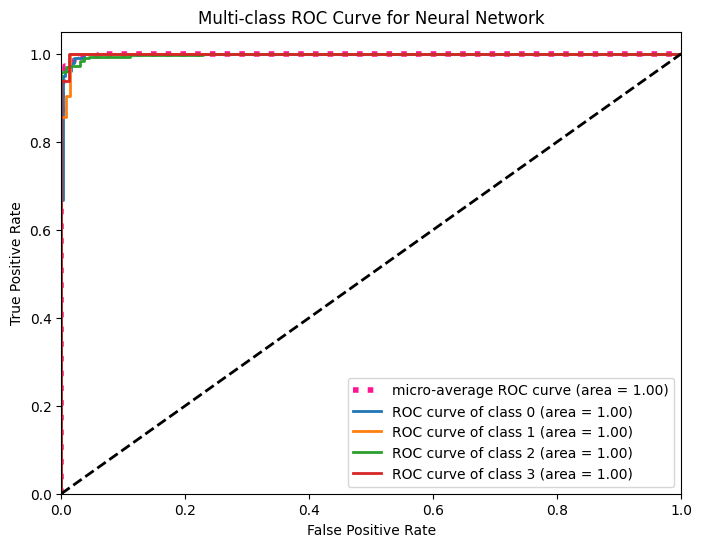

In [24]:
# function to calculate evaluation metrics using imported sklearn functions
def evaluate_model(predictions, actual):
    accuracy = accuracy_score(actual, predictions)
    precision = precision_score(actual, predictions, average="weighted")
    recall = recall_score(actual, predictions, average="weighted")
    f1 = f1_score(actual, predictions, average="weighted")
    return accuracy, precision, recall, f1

# evaluating both models
dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate_model(dt_best_predict, target_test)
nn_accuracy, nn_precision, nn_recall, nn_f1 = evaluate_model(nn_best_predict, target_test)

# printing the evaluation metrics
print("Decision Tree Model Evaluation:")
print(f"Accuracy: {dt_accuracy:.4f}, Precision: {dt_precision:.4f}, Recall: {dt_recall:.4f}, F1 Score: {dt_f1:.4f}")
print("\nNeural Network Model Evaluation:")
print(f"Accuracy: {nn_accuracy:.4f}, Precision: {nn_precision:.4f}, Recall: {nn_recall:.4f}, F1 Score: {nn_f1:.4f}")

# binarizing the output for multi-class ROC analysis
target_test_binarized = label_binarize(target_test, classes=[0, 1, 2, 3])

# calculate ROC AUC for each class and plot ROC curve
def plot_multiclass_roc(model, model_predictions, actual, classes):
    # compute ROC curve and ROC area for each class
    n_classes = len(classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(actual[:, i], model_predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(actual.ravel(), model_predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # plot ROC curves
    plt.figure(figsize=(8, 6))
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi-class ROC Curve for {model}')
    plt.legend(loc="lower right")
    plt.show()

# Predicting probabilities for each class
dt_best_probs = dt_best_model.predict_proba(feat_test)
nn_best_probs = nn_best_model.predict_proba(feat_test)

# plotting ROC curves for both models
plot_multiclass_roc("Decision Tree", dt_best_probs, target_test_binarized, classes=[0, 1, 2, 3])
plot_multiclass_roc("Neural Network", nn_best_probs, target_test_binarized, classes=[0, 1, 2, 3])
